<h2><font color="#004D7F" size=6>Módulo 7. Proyectos de Machine Learning</font></h2>



<h1><font color="#004D7F" size=5>3. Proyecto de Regresión</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Italo Contreras Perez</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [2.1. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del dataset](#section21)
    * [2.2. Visualización de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
    * [2.4. Tipo de datos](#section24)
    * [2.5. Correlación entre atributos](#section25)
    * [2.6. Valores NaN](#section26)
* [3. Visualización del dataset](#section3)
    * [3.1. Gráficos Univariado](#section31)
    * [3.2. Gráficos multivariados](#section32)
    * [3.3. Resumen de ideas](#section33)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Evaluación de línea base](#section42)
    * [4.3. Evaluar modelos: estandarización](#section43)
* [5. Fase de Optimización](#section5)
    * [5.1. Optimización de k-NN](#section51)
* [6. Agoritmos ensamblados](#section6)
    * [6.1. Comparar algoritmos ensamblados](#section61)
    * [6.2. Fase de optimización GBM](#section62)
* [7. Fase de forecasting](#section7)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


Para este proyecto, trabajaremos el conjunto de datos _Boston House Price._ Cada registro en la base de datos describe un suburbio de la ciudad de Boston. Los datos se extrajeron del área estadística metropolitana estándar de Boston (SMSA) en 1970. Los atributos se definen de la siguiente manera:
* CRIM: tasa de criminalidad per cápita por ciudad.
* ZN: proporción de tierra residencial zonificada para lotes de más de 25000 pies cuadrados.
* INDUS: proporción de acres de negocios no minoristas por ciudad.
* CHAS: variable ficticia del río Charles (=1 si el trecho delimita el río; 0 de lo contrario).
* NOX: concentración de óxidos nítricos (partes por 10 millones).
* RM: número medio de habitaciones por vivienda.
* AGE: proporción de unidades ocupadas por el propietario construidas antes de 1940.
* DIS: distancias ponderadas a cinco centros de empleo de Boston.
* RAD: índice de accesibilidad a autopistas radiales.
* TAX: tasa de impuesto a la propiedad de valor total por USD10000. 
* PTRATIO: proporción alumno-profesor por ciudad.
* B: $1000(Bk - 0.63)^2$ donde Bk es la proporción de personas de color por ciudad
* LSTAT: % menor estado de la población.
* MEDV: valor medio de las viviendas ocupadas por sus propietarios en USD1000.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

Primero, importemos todos los módulos, funciones y objetos que vamos a utilizar en este tutorial.

In [1]:
# Classification Project: Sonar rocks or mines

# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

Voy a seguir usando el dataset que escogi desde un prinicipio

In [3]:
filename_reg = 'forestfires.csv'
data = pd.read_csv(filename_reg)
data1=data.drop(['month'], axis=1)
data2=data1.drop(['day'], axis=1)
#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']

#Dividamos la data 

array_reg = data2.values

X=array_reg[:,0:10]
Y=array_reg[:,10]

X_2=data2.drop("area",1)
Y_2=data2["area"]


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Ahora es el momento de estudiar nuestros datos. En este paso vamos a echar un vistazo a los datos de varias maneras diferentes:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Coorelación de atributos numéricos.
* Tipo de atributos.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Para saber las dimensiones de mi dataframe uno la función `shape`. El primero número que se obtienen son las filas y el segundo
son las columnas

In [3]:
#Dimensiones de la data
data2.shape

(517, 11)

 Observamos que este dataframe tiene 517 filas y 13 columnas 

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

Puedo revisar los primeros 5 registros de mi dataframe con la funcion `head`, si quiereo que se muestren más filas
como por ejemplo 20 coloco esto dentro de la función. Puedo observar también que la primera columna enumera el número de fila,
lo cual es útil para hacer referencia a una observación específica.

In [4]:
# head
data2.head(5)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

Para tener algunas metricas (cantidad, promedio simple, desviación estandar, valor mínimo, percentil 25%, percentil 50%, percentil 75% y valor máximo) de cada atributo uso la funcion `describe`.
Ademas podemos usar la función `set_option` de pandas para modificar la precisión de estas metricas y el ancho preferido de la salida

In [5]:
#Resumen estadístico
pd.set_option('display.width',100)
pd.set_option('precision',3)
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000,517.00,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000
mean,4.669,4.30,90.645,110.872,547.940,9.022,18.889,44.288,4.018,0.022,12.847
std,2.314,1.23,5.520,64.046,248.066,4.559,5.807,16.317,1.792,0.296,63.656
min,1.000,2.00,18.700,1.100,7.900,0.000,2.200,15.000,0.400,0.000,0.000
25%,3.000,4.00,90.200,68.600,437.700,6.500,15.500,33.000,2.700,0.000,0.000
50%,4.000,4.00,91.600,108.300,664.200,8.400,19.300,42.000,4.000,0.000,0.520
75%,7.000,5.00,92.900,142.400,713.900,10.800,22.800,53.000,4.900,0.000,6.570
max,9.000,9.00,96.200,291.300,860.600,56.100,33.300,100.000,9.400,6.400,1090.840


Vale la pena tomarse el tiempo para observar los resultados, podemos también identificar con estas métricas los valores corruptos y outliers

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Tipo de datos</font>

Para saber a que tipo de dato pertenecen los atributos de mi dataframe usa la función `dtype' 

In [6]:
#Tipos de data para cada atributo
data2.dtypes

X         int64
Y         int64
FFMC    float64
DMC     float64
DC      float64
ISI     float64
temp    float64
RH        int64
wind    float64
rain    float64
area    float64
dtype: object

Observamos que la mayoría de los atributos son flotantes, luego siguen los interos

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Correlación entre atributos</font>

Para saber como se relacion los atributos entre si (incluido el atributo clase) usamos una matriz de correlación de Pearson, para ello usamos la función `corr()` , esta es una matriz simétrica que tiene como diagonal principal a la unidad. 
Si el número en la matriz donde se intersecan esos 2 atributos es positivo quiere decir que se relacionan de manera directa, si es negativo lo hacen de forma inversa
Podemos decir que 2 atributos tienen una fuerte correlación si este número es >0.75 o <0.75. Aquí podemos hacer 2 observaciones.
-Si comparamos 2 atributos(ninguno es el atributo clase) es preferible que tengan una baja correlación 
-Si comparamos 1 atributo con el atributo clase es preferible que se tenga una alta correlación.

In [7]:
#Coeficientes de correlación de Pearson
pd.set_option('display.width',100)
pd.set_option('precision',3)
correlation=data2.corr(method='pearson')
print(correlation)

          X      Y   FFMC    DMC     DC    ISI   temp     RH   wind   rain   area
X     1.000  0.540 -0.021 -0.048 -0.086  0.006 -0.051  0.085  0.019  0.065  0.063
Y     0.540  1.000 -0.046  0.008 -0.101 -0.024 -0.024  0.062 -0.020  0.033  0.045
FFMC -0.021 -0.046  1.000  0.383  0.331  0.532  0.432 -0.301 -0.028  0.057  0.040
DMC  -0.048  0.008  0.383  1.000  0.682  0.305  0.470  0.074 -0.105  0.075  0.073
DC   -0.086 -0.101  0.331  0.682  1.000  0.229  0.496 -0.039 -0.203  0.036  0.049
ISI   0.006 -0.024  0.532  0.305  0.229  1.000  0.394 -0.133  0.107  0.068  0.008
temp -0.051 -0.024  0.432  0.470  0.496  0.394  1.000 -0.527 -0.227  0.069  0.098
RH    0.085  0.062 -0.301  0.074 -0.039 -0.133 -0.527  1.000  0.069  0.100 -0.076
wind  0.019 -0.020 -0.028 -0.105 -0.203  0.107 -0.227  0.069  1.000  0.061  0.012
rain  0.065  0.033  0.057  0.075  0.036  0.068  0.069  0.100  0.061  1.000 -0.007
area  0.063  0.045  0.040  0.073  0.049  0.008  0.098 -0.076  0.012 -0.007  1.000


<a id="section26"></a>
## <font color="#004D7F"> 2.6.Valores NaN</font>
Es importante también verificar que no tenemos valores NaN en nuestro dataset. En nuestro caso podemos observar que no tenemos ningún valor NaN en las características.

In [10]:
print(np.sum(np.isnan(X_2)))


X       0
Y       0
FFMC    0
DMC     0
DC      0
ISI     0
temp    0
RH      0
wind    0
rain    0
dtype: int64


<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Ahora tenemos una idea básica sobre los datos. Necesitamos extender eso con algunas visualizaciones. Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones; las cuales, el objetivo principal de las mismas es aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno.

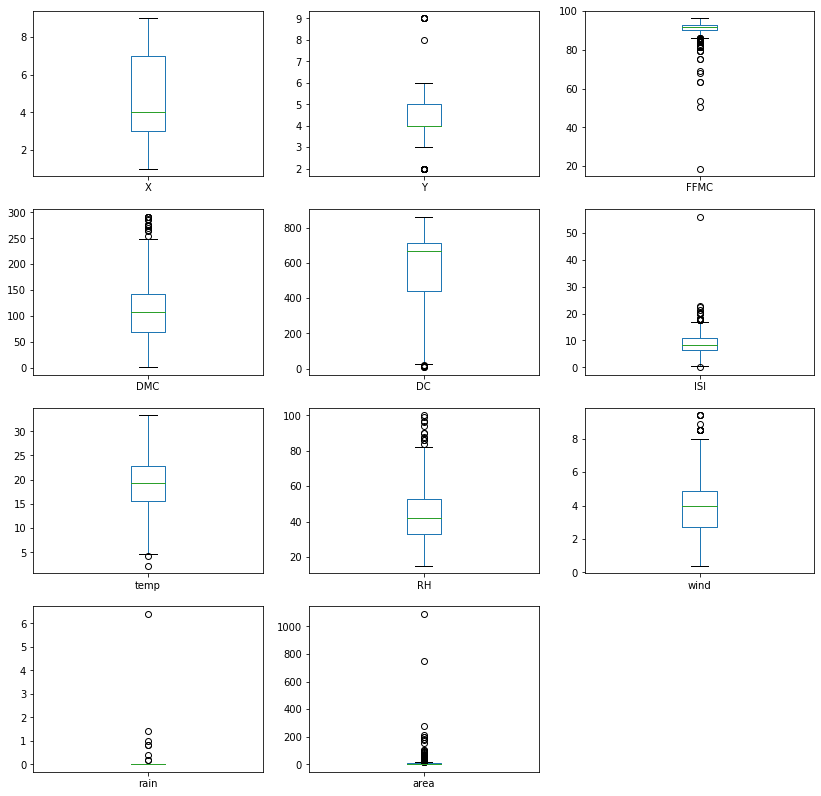

In [11]:
%matplotlib inline
# Diagramas de cajas univariados (Matplotlib)
fig=plt.figure(figsize=(14,14))
ax=fig.gca()
data2.plot(ax=ax,kind='box',subplots=True,layout=(4,3),sharex=False)
plt.show()

El atributo ISI se observa que esta bastante sesgado hacia valores más pequeños. El atributo FFMC esta bastante sesgado hacia valores más grandes 

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>
Usamos esta gráfica conocida para poder conocer la distrbución de nuestros atributos, si es gausseano, sesgado a la izquierda o derecha, si tiene una distribución exponencial, etc. También es útil para ver valores atípicos. Primero definimos el tamaño de nuestros graficos con la función `figure(figsize=())` y luego hacemos uso de la funcion `hist()` 

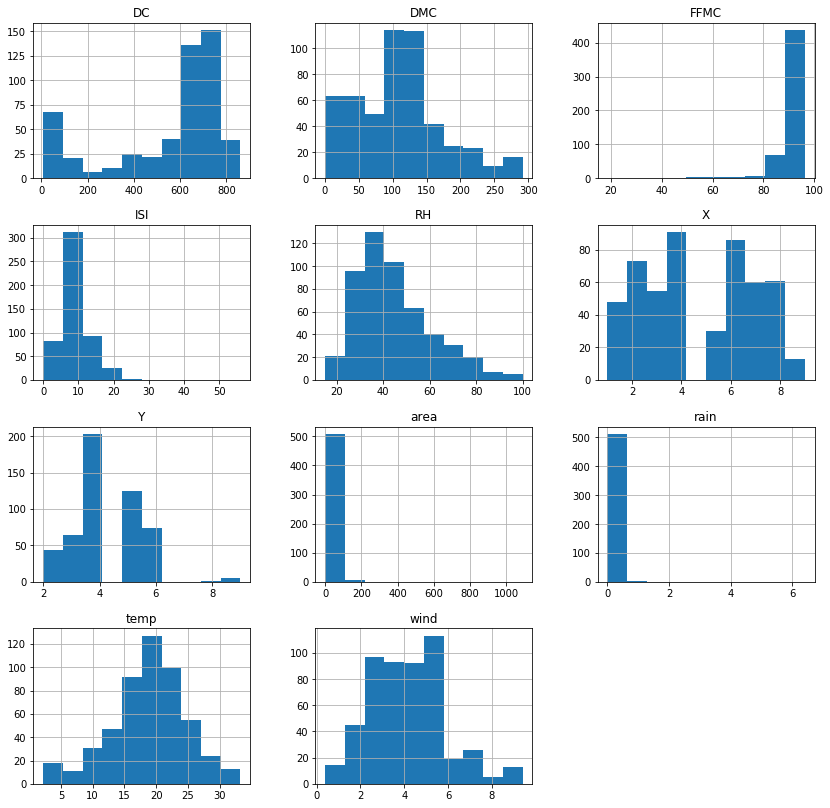

In [15]:
%matplotlib inline
# Histogramas Univariados (Matplotlib)
import matplotlib.pyplot as ptl
fig = ptl.figure(figsize=(14,14))
ax=fig.gca()
data2.hist(ax=ax)
ptl.show()

Vemos que el atributo temp(temperatura) es el que se acerca más a una distribución gauseana, esto es intesante porque muchas técnicas de aprendizaje automático suponen una distribución univariada gaussiana en las variables de entrada. Vemos que que el atributo wind(viento) tiene cierto parecido con una gausseana y que el atributo RH se acerca a una gauseana pero con un sesgo hacia la derecha. 

<a id="section311"></a>
### <font color="#004D7F"> Diagrama de densidad</font>
Esto es útil, puede ver que muchos de los atributos tienen una distribución sesgada. Una transformación de potencia como una transformación de Box-Cox que puede corregir el sesgo en las distribuciones podría ser útil.

<function matplotlib.pyplot.show(*args, **kw)>

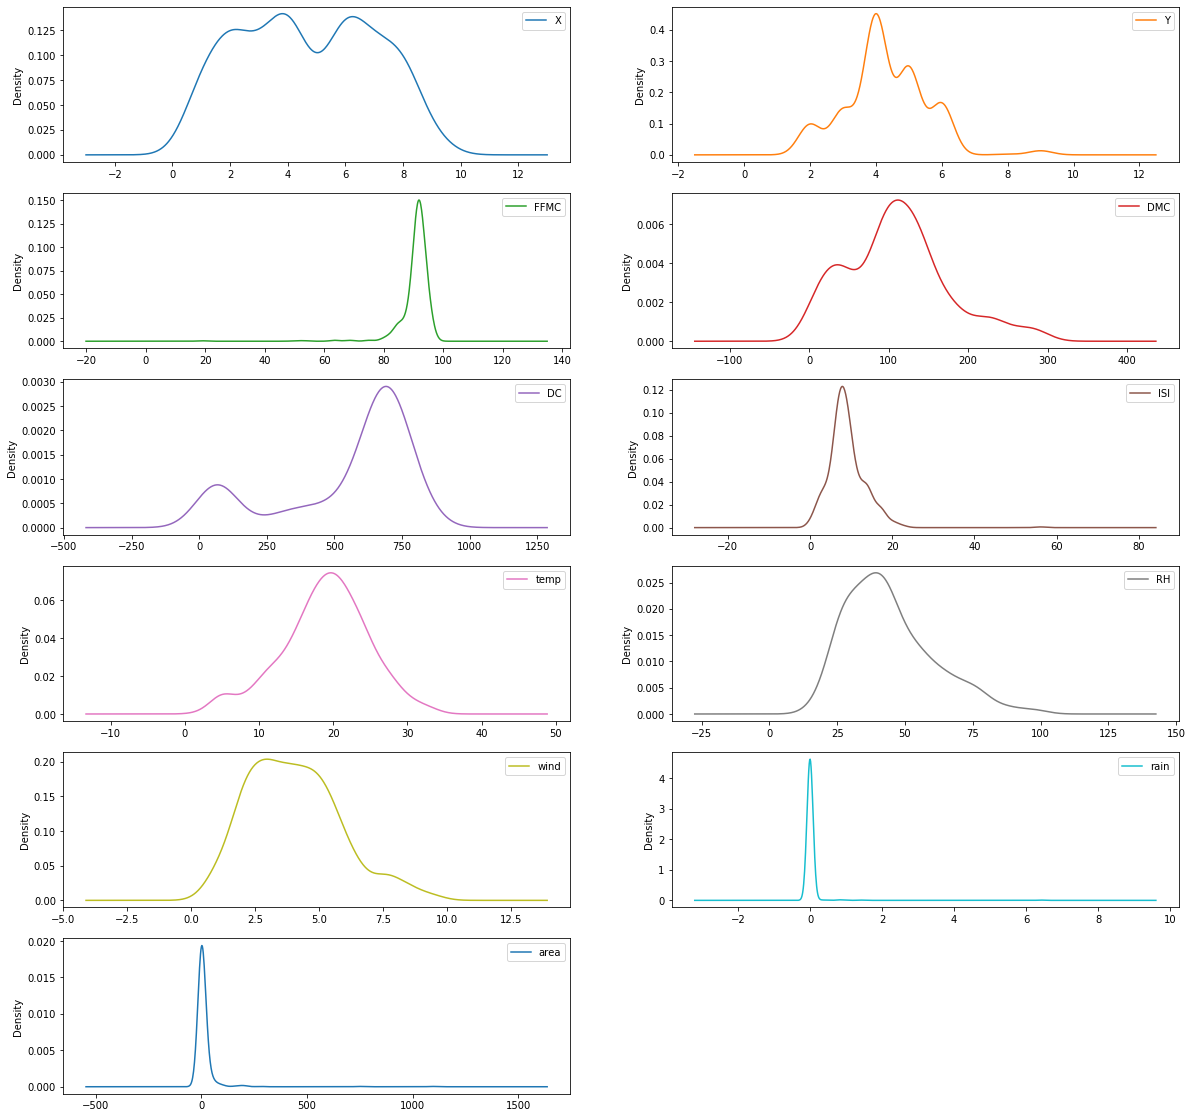

In [14]:
%matplotlib inline
# Densidad Univariada (Matplotlib)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
data2.plot(ax=ax, kind='density', subplots=True, layout=(6,2), sharex=False)
plt.show

Las rayas que aparecen en el eje X son los valores para cada atributo Para el atributo area(area incendiada) se observa que los valores estan muy pegados y la mayoria esta entre 0 y 50 aprox. Para el atributo DC también se observa valores pegados y la mayoria estan entre [0,100] y [580,780] aprox. . Para el atributo FFMC tenemos valores pegados también que se encuentran entre [85,100] aprox. Para el atributo RH vemos el caso contrario puesto que los valores se encuentran separados

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Los gráficos multivariables son los gráficos en los que podemos analizar la relación o interacciones entre atributos. El objetivo es aprender algo acerca de la distribución, la tendencia y la distribución en grupos de datos, generalmente pares de atributos. Igual que en la visualización multivariable aqui podemos usar las librerias Matplotlib y Seaborn 

<a id="section321"></a>
### <font color="#004D7F"> Diagramas de dispersión</font>
Primero veamos los diagramas de dispersión de todos los pares de atributos y coloreamos los puntos por clase. Además, como los gráficos de dispersión muestran que los puntos para cada clase generalmente están separados, podemos dibujar puntos suspensivos alrededor de ellos.

Ahora podemos ver las interacciones entre las variables. Veamos gráficos de dispersión de todos los pares de atributos. Esto puede ser útil para detectar relaciones estructuradas entre variables de entrada. Tenga en cuenta la agrupación diagonal de algunos pares de atributos. Esto sugiere una alta correlación y una relación predecible.

<function matplotlib.pyplot.show(*args, **kw)>

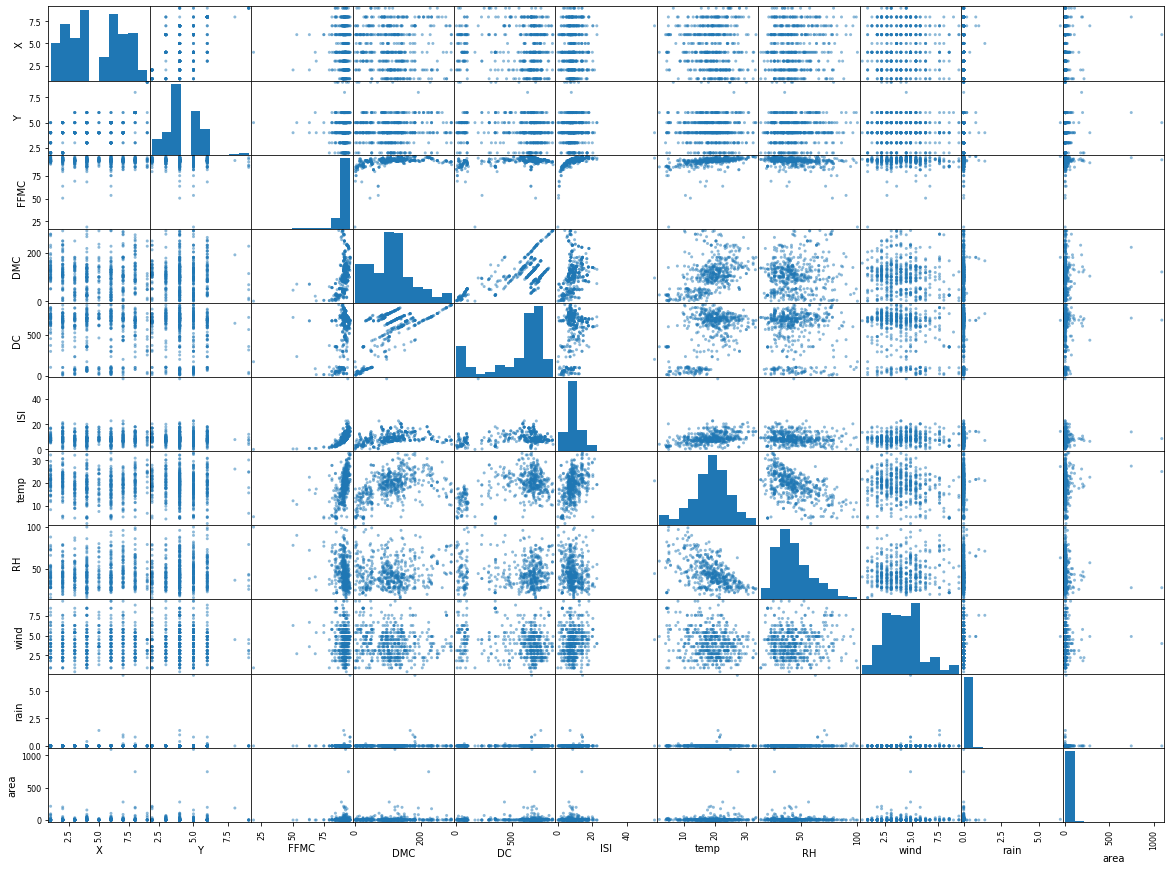

In [16]:
%matplotlib inline
#Matriz de dispersión (Matplotlib)
from pandas.plotting import scatter_matrix
plt.rcParams["figure.figsize"]=[20,15]
scatter_matrix(data2)
plt.show

Al igual que hemos visto antes podemos ver también el gráfico con la librería Seaborn. Aqui usaremos la función `pairplot`

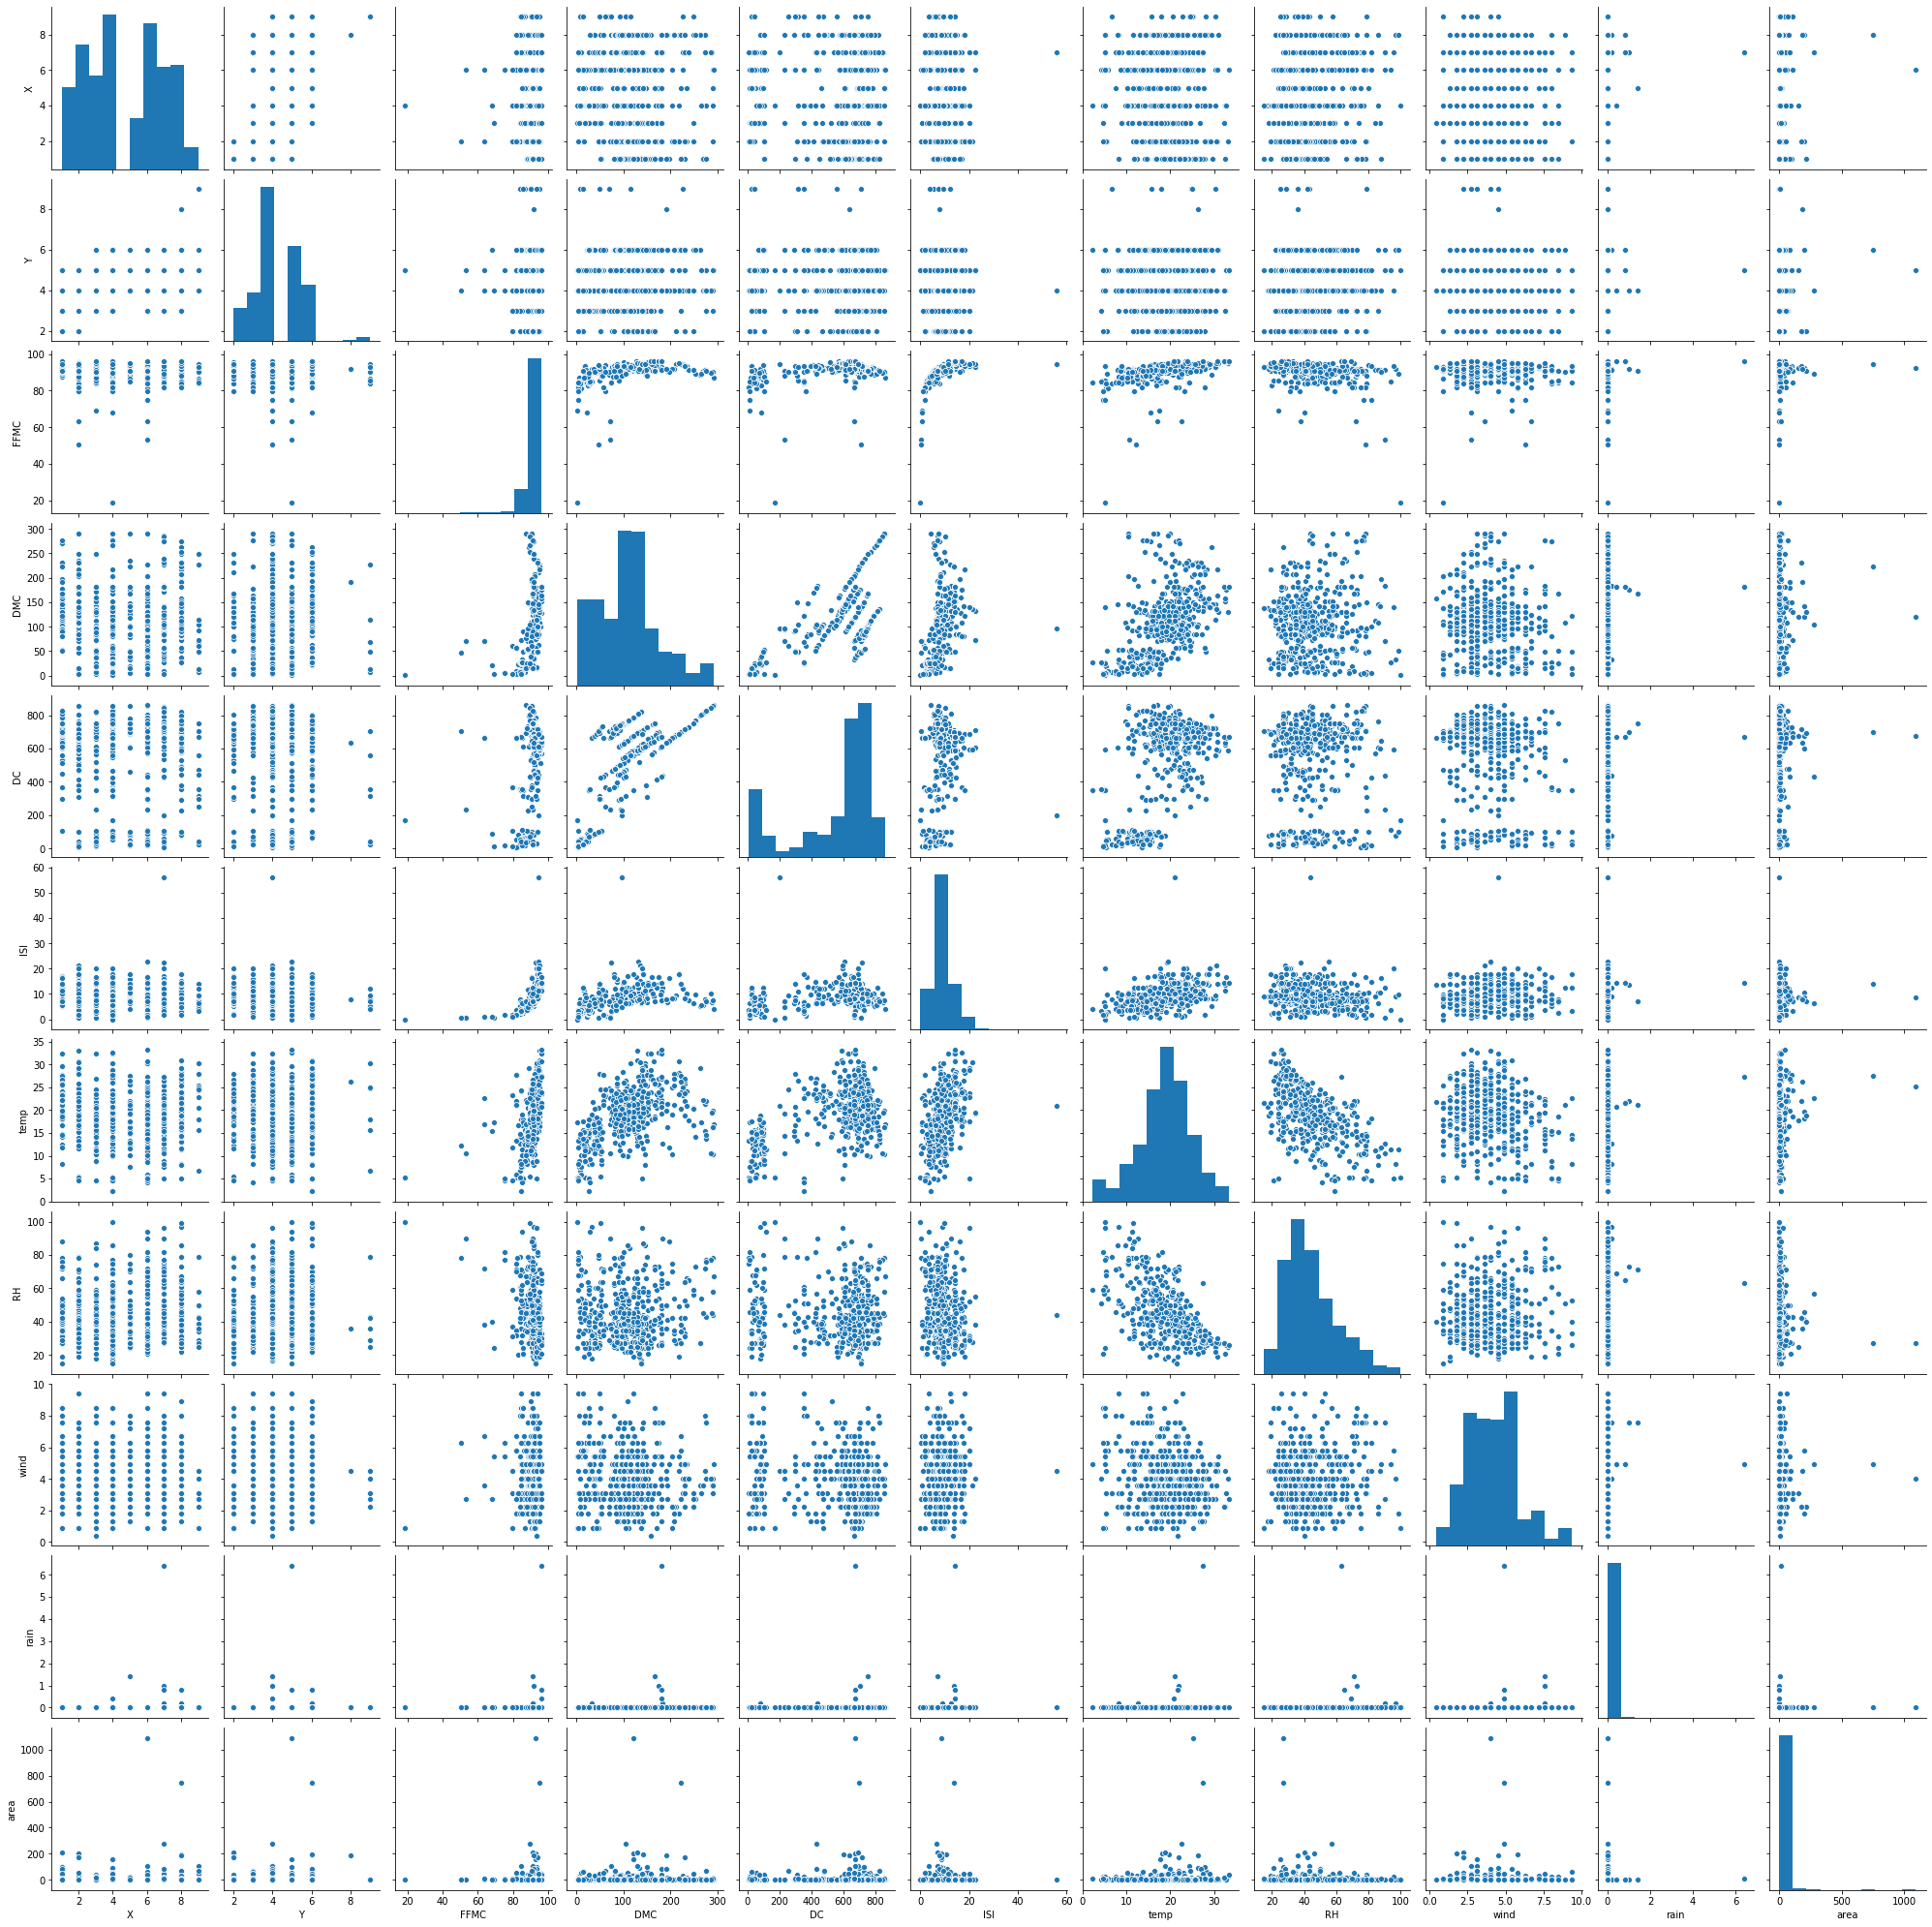

In [17]:
%matplotlib inline
# Matriz de dispersion (Seaborn)
sns.pairplot(data2)

Entre los atributos DMC y DC hay cierta tendencia a una recta y se podria tratar de un problema de regresión. Para varios atributos al ir comparandose de 2 se observa cierto agrupamiento(clusterización).

<a id="section321"></a>
### <font color="#004D7F"> Correlación entre atributos</font>
La correlación nos sirve para obervar que tanto se relacion los atributos entre si (incluido el atirbuto clase) como ya se explicó anteriormente. En esta ocasión dibujaremos una matriz con esos numeros con los siguientes parametros paso a paso como indica el código: tamaño de los cuadrantes, color de la matriz, valor minimo y maximo de los numeros que estaran en la matriz,de cuanto en cuanto van a saltar estos valores para la barra indicadora de la derecha, el eje x, el eje y y que nombres apareceran en ambos ejes. Vemos que debemos definir un arreglo con los nombres de los atributos. 
Los cuadrados serán más amarillos cuandos se acerquen al 1, más azules cuando se acerquen al -1 y neutral (entre celeste y verde) cuando se acerquen al 0.
También podemos ver que cada variable está perfectamente correlacionada positivamente entre sí (como era de esperar) en la línea diagonal desde la parte superior izquierda a la parte inferior derecha.

<function matplotlib.pyplot.show(*args, **kw)>

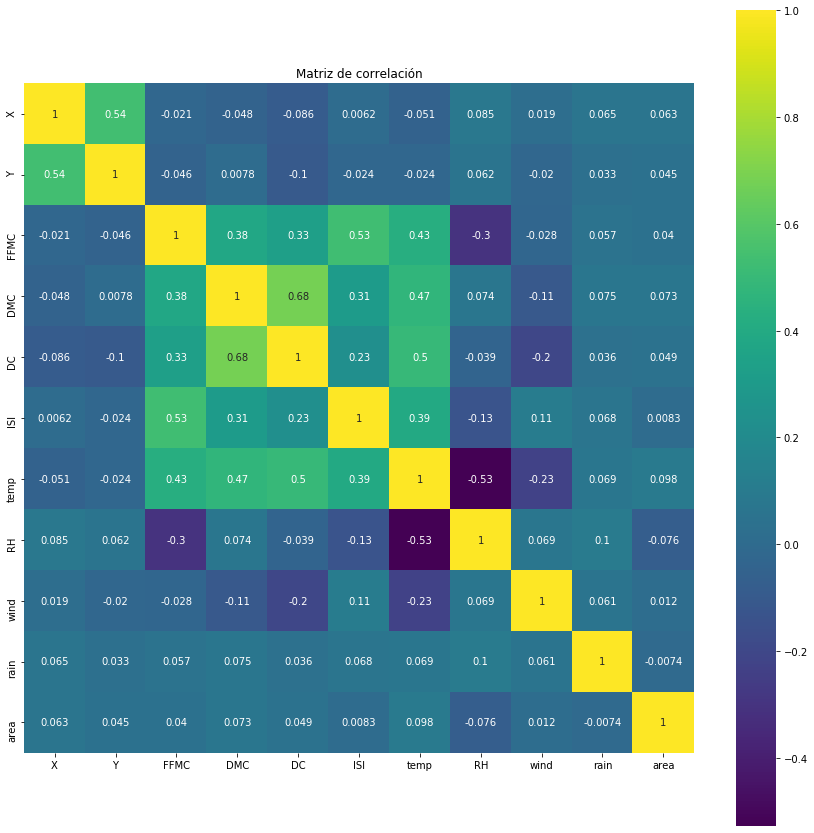

In [18]:
%matplotlib inline
#Matriz de correlación (Seaborn)
correlation=data2.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show

Vemos que los atributos que tienen más correlacion en sentido directo comparados con el resto son el DC con el DMC con un valor de 0.68 (aunque en sí sigue siendo bajo porque no es tan cercano al 1) esto quiere decir que si el DC aumenta o disminuye pasará lo mismo con el DMC7 Vemos que los atributos que tienen más relacion en sentido inverso comparados con el reston son el RH con el temp(temperatura) con un valor de -0.53 (igual no es tan alta es correlación porque es algo lejana al -1), esto quiere decir que si el RH aumenta o disminuye la temp disminuira o aumentará.

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Ahora es el momento de crear algunos modelos de datos y estimar el MSE en datos no etiquetados. Esto es lo que vamos a cubrir en este paso:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Es una buena idea utilizar un conjunto de validación. Esta es una muestra de los datos que retenemos de nuestro análisis y modelado. Dividiremos el conjunto de datos cargado en dos, el 80% de los cuales utilizaremos para entrenar nuestros modelos y el 20% como un conjunto de datos de validación

In [4]:
# Split-out validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
                                               test_size=validation_size, random_state=seed)

X


array([[ 7. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. , 94.4, ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 79.5, ..., 31. ,  4.5,  0. ]])

Ahora tiene datos de entrenamiento en `X_train` e `Y_train` para preparar modelos y conjuntos de `X_validation` e `Y_validation` que podemos usar más adelante.

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Evaluación de línea base</font>

No sabemos qué algoritmos funcionarán bien en este conjunto de datos. Podemos intuir que algoritmos de regresión como la LiR y ElasticNet (EN) pueden funcionar bien. También es posible que los CART e incluso SVM funcionen bien, aunque debemos probar. Utilizaremos la validación cruzada 10 _fold_. El conjunto de datos no es demasiado pequeño y esta es una buena configuración de prueba estándar. Evaluaremos algoritmos utilizando la métrica de error cuadrático medio (MSE). 

Todos los algoritmos usan hiperparámetros predeterminados. Comparemos los algoritmos. Mostraremos la media y la desviación estándar de MSE para cada algoritmo a medida que lo calculemos y recopilemos los resultados para su uso posterior.

In [10]:

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms

models= []

models.append(( 'LiR',LinearRegression( )))
models.append(( 'Ridge',Ridge()))
models.append(( 'Lasso',Lasso()))
models.append(( 'ElN',ElasticNet()))
models.append(( 'KNN',KNeighborsRegressor()))
models.append(( 'CART',DecisionTreeRegressor(criterion='friedman_mse')))
models.append(( 'SVR',SVR(kernel='linear')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print({name}, cv_results.mean(), ({cv_results.std()}))
    

{'LiR'} -4589.6847368683075 {8867.027717135163}
{'Ridge'} -4577.588724542246 {8855.3505172807}
{'Lasso'} -4566.373230096475 {8867.384485463146}
{'ElN'} -4563.3219644741575 {8866.265064002217}
{'KNN'} -5194.6673428218355 {8436.39089282725}
{'CART'} -10970.845272695991 {10946.53243738822}
{'SVR'} -4667.039413951965 {9184.562415583117}


Podemos ver que ElN es el que obtiene el mejor rendimiento seguido muy de cerca de varios. Siempre es aconsejable observar la distribución de las métricas calculados en los _folds_ de validación cruzada. Podemos hacerlo gráficamente usando Boxplot.

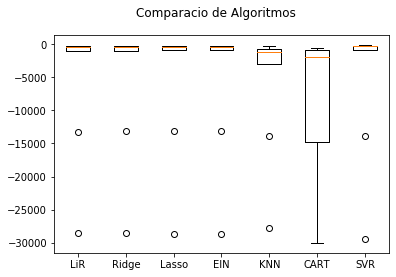

In [12]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Comparacio de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Vemos que el ElN es el modelo que tiene un error menor y tambien una menor varianza.

En la siguiente sección veremos cómo ejecutar los mismos algoritmos utilizando una copia estandarizada de los datos.

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización</font>

Sospechamos que las diferentes distribuciones de los datos en bruto pueden estar afectando negativamente a la habilidad de algunos de los algoritmos. Vamos a evaluar los mismos algoritmos con una copia estandarizada del conjunto de datos. Aquí es donde los datos se transforman de manera que cada atributo tenga un valor medio de cero y una desviación estándar de uno. 

También debemos evitar la fuga de datos cuando transformamos los datos. Una buena manera de evitar fugas es usar Pipelines que estandaricen los datos y construyan el modelo para cada _fold_ de la validación cruzada. De esa forma podemos obtener una estimación justa de cómo cada modelo con datos estandarizados podría funcionar en datos no vistos.

In [7]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLiR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledElN', Pipeline([('Scaler', StandardScaler()),('ElN', ElasticNet())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(criterion='friedman_mse'))])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='linear'))])))

results = []

names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print({name}, {cv_results.mean()}, ({cv_results.std()}) )

{'ScaledLiR'} {-4589.684736868309} {8867.027717135163}
{'ScaledRidge'} {-4588.968978901946} {8867.200771927133}
{'ScaledLASSO'} {-4559.457064944332} {8901.824187906164}
{'ScaledElN'} {-4541.142543316122} {8912.910332455602}
{'Scaledk-NN'} {-5671.630958329152} {8367.939974028444}
{'ScaledCART'} {-9768.928233491579} {11183.984065208255}
{'ScaledSVR'} {-4668.999717414814} {9185.563378318757}


Vemos que con este procedimiento el algoritmo ElN sigue siendo el que tiene un menor MSE , por lo tanto tomaremos este modelo para trabajarlo; ademas tiene una varianza muy parecida a la del resto y tambien es una de las menores 

Echemos un vistazo a la distribución de las puntuaciones en los _fold_ de validación cruzada.

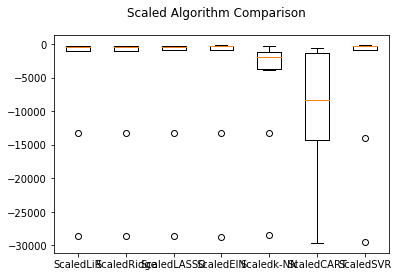

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de Optimización</font>

En esta sección investigamos el ajuste de los parámetros para el algoritmo ElN, que es el que nos salio del analisis anterior que es el que tiene menos MSE la cual es la metrica que estamos analizando

<a id="section51"></a>
## <font color="#004D7F"> 5.1. Optimización de ElN</font>

Aca usaremos el GridSearch para determinar el mejor parametro alpha con el cual nuestro modelo ElasticNet tendra un menor MSE, para ello usaremos un conjunto de posibles valores de alpha, entre 0 y 1

In [11]:
# Tune scaled KNN

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

alpha = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


param_grid=dict(alpha=alpha)

model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid= param_grid,scoring=scoring, cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)


print({grid_result.best_score_.mean()}, {grid_result.best_estimator_.alpha})



{-4577.633969135712} {1.0}


Podemos ver que la configuración óptima es alpha=1 (default) que nos da, diferencia cierta diferencia al MSE que obtuvimos anteriormente pero no es significativa

<a id="section6"></a>
# <font color="#004D7F"> 6. Algoritmos ensamblados</font>

Otra forma en que podemos mejorar el rendimiento de los algoritmos en este problema es mediante el uso de modelos ensamblados. 

<a id="section61"></a>
## <font color="#004D7F"> 6.1. Comparar algoritmos ensamblados</font>

En esta sección evaluaremos cuatro algoritmos ensamblados diferentes, dos tipo Boosting y dos tipo  Bagging:
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

Utilizaremos una validación cruzada de 10 y un Pipeline que estandarizan los datos de entrenamiento para cada _fold_.

In [74]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print({name}, {cv_results.mean()}, ({cv_results.std()}))

{'ScaledAB'} {-5510.507690490436} {8455.115596630872}
{'ScaledGBM'} {-6964.294321933795} {9198.463289199653}
{'ScaledRF'} {-5928.429903225186} {8817.977719488303}
{'ScaledET'} {-6183.317101700884} {8105.717007318772}


Vemos que el algoritmo que nos genera un menor MSE y a su vez menor varianza es el AB por lo tanto trabajaremos con este

Ejecutar el ejemplo calcula el error cuadrático medio para cada método utilizando los parámetros predeterminados. Podemos ver que generalmente estamos obteniendo peores puntajes que nuestros algoritmos anteriores. Esto nos quiere decir que el usar algoritmos ensamblados no necesariamene nos asegura que estos seran mas optimos, tiene que ver en gran medida las caracteristicas de nuestro conjunto de datos que estamos trabajando

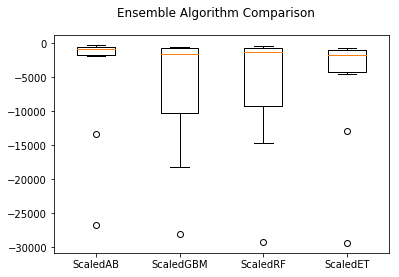

In [59]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a id="section62"></a>
## <font color="#004D7F"> 6.2. Fase de optimización AB</font>

El número predeterminado de etapas de refuerzo para realizar (`n_estimators`) es 100. Este es un buen parámetro candidato de AB para optimizar. A menudo, cuanto mayor sea el número de etapas de impulso, mejor será el rendimiento, pero mayor será el tiempo de entrenamiento. 

A continuación, definimos una `GridSearchCV` con valores de estimadores de 50 a 400 en incrementos de 50. Cada configuración se evalúa mediante una validación cruzada de 10.

In [61]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))

model = AdaBoostRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print({grid_result.best_score_.mean()}, {grid_result.best_estimator_.n_estimators})



{-4640.744820530897} {150}


Como antes, podemos resumir la mejor configuración y tener una idea de cómo cambió el rendimiento con cada configuración diferente.

Podemos ver que la mejor configuración fue `n_estimators = 150`, lo que resultó en un error cuadrático medio de 4640, casi 1000 unidades menos de MSE que el método no optimizado.

<a id="section7"></a>
# <font color="#004D7F"> 7. Fase de Forecasting</font>

En esta sección finalizaremos el modelo de aumento de gradiente y lo evaluaremos en nuestro conjunto de datos de validación. Primero necesitamos preparar el modelo y entrenarlo en todo el conjunto de datos de entrenamiento. Esto incluye estandarizar el conjunto de datos de entrenamiento antes del entrenamiento.

In [15]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ElasticNet(alpha=1)
model.fit(rescaledX, Y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Luego podemos escalar las entradas para el conjunto de datos de validación y generar predicciones.

In [14]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

1919.3916204752043


Podemos ver que el MSE es 1919 que esta debajo a los 4577 que se obtuvo, esto nos puede indicar que hay cierto underfitting pero no es muy seguro esto por que el MSE nos da una idea de la diferencia de nuestros datos con el modelo, para tener un analisis mas preciso podriamos usar otras metricas como el R2 y de esta forma sacar mejores conclusiones